# CSI4142 - Fundamentals of Data Science Assignment 2  

## *Data Cleaning*  

**Professor**: Caroline Barrière  
**Students**: Mohamed-Obay Alshaer & Samih Karroum  
**Student Numbers**: 300170489 & 300188957  
**Submission Date**: February 25th, 2025  
**Group Number**: 39  

---  

## Assignment Overview  

This notebook implements a **Clean Data Checker**, designed to validate the integrity and quality of a dataset by identifying common data issues. The checker performs **10 different validation tests**, each targeting a specific type of potential error:  

1. **Data Type Errors** – Ensuring values match their expected data types.  
2. **Range Errors** – Checking if numerical values fall within an expected range.  
3. **Format Errors** – Validating that data follows a specific format (e.g., dates, IDs).  
4. **Consistency Errors** – Identifying conflicting or contradictory values.  
5. **Uniqueness Errors** – Verifying attributes that should have unique values.  
6. **Presence Errors** – Detecting missing values in required fields.  
7. **Length Errors** – Checking if text values meet length constraints.  
8. **Look-up Errors** – Ensuring categorical values exist in a predefined list.  
9. **Exact Duplicate Errors** – Detecting completely duplicated rows.  
10. **Near Duplicate Errors** – Identifying rows that are very similar but not identical.  

Each test is structured into **four parts**:  

1. **Error Description** – Explanation of the type of error being checked.  
2. **Parameter Definition** – A cell where users can define validation rules.  
3. **Validation Code** – The logic that performs the check based on provided parameters.  
4. **Results Report** – A summary of detected issues with examples.  

---  

## Dataset Description  

The dataset used in this notebook contains **records of real estate transactions in New York City** over a **12-month period**. Each row represents a **building or building unit sale** and includes information such as location, address, property type, sale price, and sale date.  

### **Key Fields**  
- **BOROUGH** – Encoded as a digit (1–5) representing different NYC boroughs.  
- **BLOCK, LOT** – Together with BOROUGH, these form a unique property identifier.  
- **BUILDING CLASS AT PRESENT / TIME OF SALE** – Indicates the type of property.  
- **SALE PRICE** – The transaction amount for the property.  
- **SALE DATE** – The date when the property was sold.  

### **Important Considerations**  
- Some sales have **$0 or very low values**, which often indicate **property transfers** rather than standard sales.  
- Sales data follows **financial definitions**, meaning some records represent **entire buildings**, while others represent **individual apartments**.  

This dataset provides **valuable insight into NYC's real estate market trends**, and by running the **Clean Data Checker**, we can identify and correct **potential data quality issues** before further analysis.  


In [1]:
!pip3 install fuzzywuzzy tqdm



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
import itertools
from tqdm import tqdm

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df = pd.read_csv('./nyc-rolling-sales.csv', index_col=0)

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# Check the basic shape and information about the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn names:")
for col in df.columns:
    print(f"- {col}")

Number of rows: 84548
Number of columns: 21

Column names:
- BOROUGH
- NEIGHBORHOOD
- BUILDING CLASS CATEGORY
- TAX CLASS AT PRESENT
- BLOCK
- LOT
- EASE-MENT
- BUILDING CLASS AT PRESENT
- ADDRESS
- APARTMENT NUMBER
- ZIP CODE
- RESIDENTIAL UNITS
- COMMERCIAL UNITS
- TOTAL UNITS
- LAND SQUARE FEET
- GROSS SQUARE FEET
- YEAR BUILT
- TAX CLASS AT TIME OF SALE
- BUILDING CLASS AT TIME OF SALE
- SALE PRICE
- SALE DATE


In [5]:
print("\nData types:")
print(df.dtypes)


Data types:
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object


### Test 1: Data Type Errors
**Description:**  
This test verifies that the values in specific attributes match their expected data types (e.g., numeric, string, date). For example, the `BOROUGH` and `SALE PRICE` should be numeric while `ADDRESS` should be a string.

In [6]:
# PARAMETERS FOR THE CHECKER
# List all columns to check
columns_to_check = {
    'BOROUGH': 'integer',
    'BLOCK': 'integer',
    'LOT': 'integer',
    'SALE PRICE': 'integer',
    'SALE DATE': 'date',
    'BUILDING CLASS CATEGORY': 'string',
    'TAX CLASS AT PRESENT': 'string',
    'NEIGHBORHOOD': 'string'
}


date_formats = ['%m/%d/%Y', '%Y-%m-%d %H:%M:%S']

In [7]:
# CHECKER CODE
def check_data_types(df, columns_to_check, date_format):
    """
    Check if columns in the dataframe have the expected data types.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check
    columns_to_check : dict
        Dictionary with column names as keys and expected data types as values
    date_format : str
        The expected format for date columns
        
    Returns:
    --------
    dict
        A dictionary with column names as keys and lists of problematic rows as values
    """
    errors = {}
    
    for column, expected_type in columns_to_check.items():
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue
            
        error_rows = []
        
        if expected_type == 'integer':
            # Check if values can be converted to integers
            for idx, value in enumerate(df[column]):
                if pd.isna(value):
                    continue
                try:
                    int(value)
                except (ValueError, TypeError):
                    error_rows.append((idx, value))
                    
        elif expected_type == 'float':
            # Check if values can be converted to floats
            for idx, value in enumerate(df[column]):
                if pd.isna(value):
                    continue
                try:
                    # Remove currency symbol and commas if present
                    if isinstance(value, str):
                        value = value.replace('$', '').replace(',', '')
                    float(value)
                except (ValueError, TypeError):
                    error_rows.append((idx, value))
                    
        elif expected_type == 'date':
            # Check if values match any of the accepted date formats
            for idx, value in enumerate(df[column]):
                if pd.isna(value):
                    continue
                valid_date = False
                for format in date_formats:
                    try:
                        if isinstance(value, str):
                            datetime.strptime(value, format)
                            valid_date = True
                            break
                    except ValueError:
                        continue
                if not valid_date:
                    error_rows.append((idx, value))
                    
        elif expected_type == 'string':
            # Check if values are strings
            for idx, value in enumerate(df[column]):
                if pd.isna(value):
                    continue
                if not isinstance(value, str):
                    error_rows.append((idx, value))
        
        if error_rows:
            errors[column] = error_rows
            
    return errors

# Run the checker
data_type_errors = check_data_types(df, columns_to_check, date_formats)

Data Type Error Report:
--------------------------------------------------

Column 'SALE PRICE' (expected type: integer):
Found 14561 data type errors.
Examples:
  - Row 2: ' -  '
  - Row 3: ' -  '
  - Row 6: ' -  '
  - Row 8: ' -  '
  - Row 9: ' -  '
  - ... and 14556 more errors.


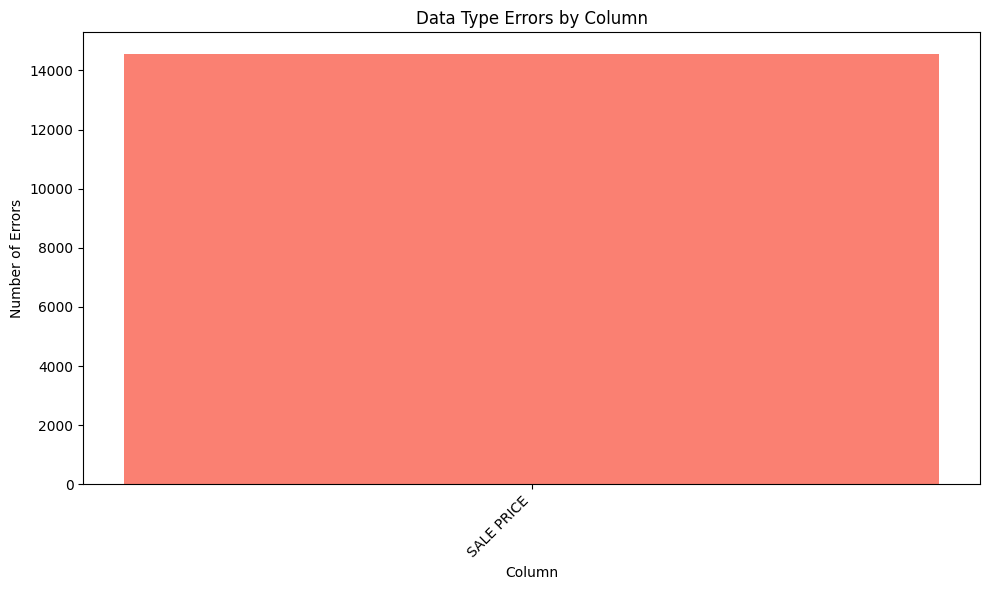

In [8]:
# RESULT
print("Data Type Error Report:")
print("-" * 50)

if not data_type_errors:
    print("No data type errors found.")
else:
    for column, errors in data_type_errors.items():
        expected_type = columns_to_check[column]
        print(f"\nColumn '{column}' (expected type: {expected_type}):")
        print(f"Found {len(errors)} data type errors.")
        print("Examples:")
        for i, (idx, value) in enumerate(errors[:5]):  # Show first 5 examples
            print(f"  - Row {idx+1}: '{value}'")
        if len(errors) > 5:
            print(f"  - ... and {len(errors)-5} more errors.")
            
    # Create a bar chart of error counts
    error_counts = {column: len(errors) for column, errors in data_type_errors.items()}
    plt.figure(figsize=(10, 6))
    plt.bar(error_counts.keys(), error_counts.values(), color='salmon')
    plt.title('Data Type Errors by Column')
    plt.xlabel('Column')
    plt.ylabel('Number of Errors')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Test 2: Range Errors
**Description:**  
This test verifies that numerical values fall within an acceptable range. For instance, the `SALE PRICE` should be between a defined minimum and maximum.

In [9]:
# PARAMETERS FOR THE CHECKER
# List all columns to check with their min and max values
range_checks = {
    'BOROUGH': {'min': 1, 'max': 5},
    'SALE PRICE': {'min': 1, 'max': 100000000},  # $1 to $100 million
    'BLOCK': {'min': 1, 'max': 20000},
    'LOT': {'min': 1, 'max': 10000}
}

# Flag whether to include or exclude zeros
include_zeros = {
    'SALE PRICE': False,  # Exclude zero prices as they might represent transfers
    'BOROUGH': True,      # No zero boroughs
    'BLOCK': True,
    'LOT': True
}

In [10]:
# CHECKER CODE
def check_ranges(df, range_checks, include_zeros):
    """
    Check if numerical values in the dataframe fall within expected ranges.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check
    range_checks : dict
        Dictionary with column names as keys and dictionaries of min/max values
    include_zeros : dict
        Dictionary indicating whether zeros should be included in the check
        
    Returns:
    --------
    dict
        A dictionary with column names as keys and lists of out-of-range rows
    """
    errors = {}
    
    for column, ranges in range_checks.items():
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue
        
        min_val = ranges['min']
        max_val = ranges['max']
        include_zero = include_zeros.get(column, True)
        
        out_of_range_rows = []
        
        for idx, value in enumerate(df[column]):
            if pd.isna(value):
                continue
                
            # Convert to numeric value
            try:
                if isinstance(value, str):
                    value = value.replace('$', '').replace(',', '')
                num_value = float(value)
                
                # Check if value is out of range
                if not include_zero and num_value == 0:
                    continue
                if num_value < min_val or num_value > max_val:
                    out_of_range_rows.append((idx, num_value))
            except (ValueError, TypeError):
                continue
                
        if out_of_range_rows:
            errors[column] = out_of_range_rows
            
    return errors

# Run the checker
range_errors = check_ranges(df, range_checks, include_zeros)

In [11]:
#RESULT 
# Generate report
print("Range Error Report:")
print("-" * 50)

if not range_errors:
    print("No range errors found.")
else:
    for column, errors in range_errors.items():
        ranges = range_checks[column]
        print("There were various range errors found in the dataset, specifically from the 'SALE PRICE' column.")
        print(f"\nColumn '{column}' (expected range: {ranges['min']} to {ranges['max']}):")
        print(f"Found {len(errors)} range errors.")
        print("Examples:")
        for i, (idx, value) in enumerate(errors[:5]):  # Show first 5 examples
            print(f"  - Row {idx+1}: {value}")
        if len(errors) > 5:
            print(f"  - ... and {len(errors)-5} more errors.")


Range Error Report:
--------------------------------------------------
There were various range errors found in the dataset, specifically from the 'SALE PRICE' column.

Column 'SALE PRICE' (expected range: 1 to 100000000):
Found 48 range errors.
Examples:
  - Row 932: 150000000.0
  - Row 942: 107250000.0
  - Row 951: 139725000.0
  - Row 1123: 141500000.0
  - Row 2047: 108000000.0
  - ... and 43 more errors.


### Test 3: Format Errors
**Description:**  
This test validates that data follows a specified format. For example, the `SALE DATE` should follow the format `YYYY-MM-DD` and the `ADDRESS` should match a certain pattern.

In [12]:
# PARAMETERS FOR THE CHECKER
# List all columns to check with their expected format patterns
format_patterns = {
    'SALE DATE': r'^\d{1,2}/\d{1,2}/\d{4}$',  # MM/DD/YYYY format
    'BOROUGH': r'^[1-5]$',  # Single digit 1-5
    'BUILDING CLASS AT PRESENT': r'^[A-Z][0-9]$',  # Letter followed by a number
    'BUILDING CLASS AT TIME OF SALE': r'^[A-Z][0-9]$',  # Letter followed by a number
    'ZIP CODE': r'^\d{5}$'  # 5-digit zip code
}

# Number of rows to check (0 for all rows)
max_rows_to_check = 0  

In [13]:
# CHECKER CODE
def check_formats(df, format_patterns, max_rows_to_check=0):
    """
    Check if values in the dataframe match the expected format patterns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check
    format_patterns : dict
        Dictionary with column names as keys and regex patterns as values
    max_rows_to_check : int
        Maximum number of rows to check (0 for all rows)
        
    Returns:
    --------
    dict
        A dictionary with column names as keys and lists of incorrectly formatted rows
    """
    errors = {}
    
    # Determine how many rows to check
    num_rows = len(df) if max_rows_to_check == 0 else min(max_rows_to_check, len(df))
    
    for column, pattern in format_patterns.items():
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue
            
        format_errors = []
        
        for idx in range(num_rows):
            value = df.iloc[idx][column]
            if pd.isna(value):
                continue
                
            # Convert to string for regex matching
            str_value = str(value)
            
            # Check if value matches the pattern
            if not re.match(pattern, str_value):
                format_errors.append((idx, str_value))
                
        if format_errors:
            errors[column] = format_errors
            
    return errors

# Run the checker
format_errors = check_formats(df, format_patterns, max_rows_to_check)

Format Error Report:
--------------------------------------------------

Column 'SALE DATE' (expected format: ^\d{1,2}/\d{1,2}/\d{4}$):
Found 84548 format errors.
Examples:
  - Row 1: '2017-07-19 00:00:00'
  - Row 2: '2016-12-14 00:00:00'
  - Row 3: '2016-12-09 00:00:00'
  - Row 4: '2016-09-23 00:00:00'
  - Row 5: '2016-11-17 00:00:00'
  - ... and 84543 more errors.

Column 'BUILDING CLASS AT PRESENT' (expected format: ^[A-Z][0-9]$):
Found 3426 format errors.
Examples:
  - Row 74: 'RR'
  - Row 75: ' '
  - Row 76: 'RR'
  - Row 199: ' '
  - Row 200: 'RK'
  - ... and 3421 more errors.

Column 'BUILDING CLASS AT TIME OF SALE' (expected format: ^[A-Z][0-9]$):
Found 2818 format errors.
Examples:
  - Row 74: 'RR'
  - Row 75: 'RR'
  - Row 76: 'RR'
  - Row 199: 'RA'
  - Row 200: 'RK'
  - ... and 2813 more errors.

Column 'ZIP CODE' (expected format: ^\d{5}$):
Found 982 format errors.
Examples:
  - Row 75: '0'
  - Row 199: '0'
  - Row 576: '0'
  - Row 577: '0'
  - Row 721: '0'
  - ... and 977 mo

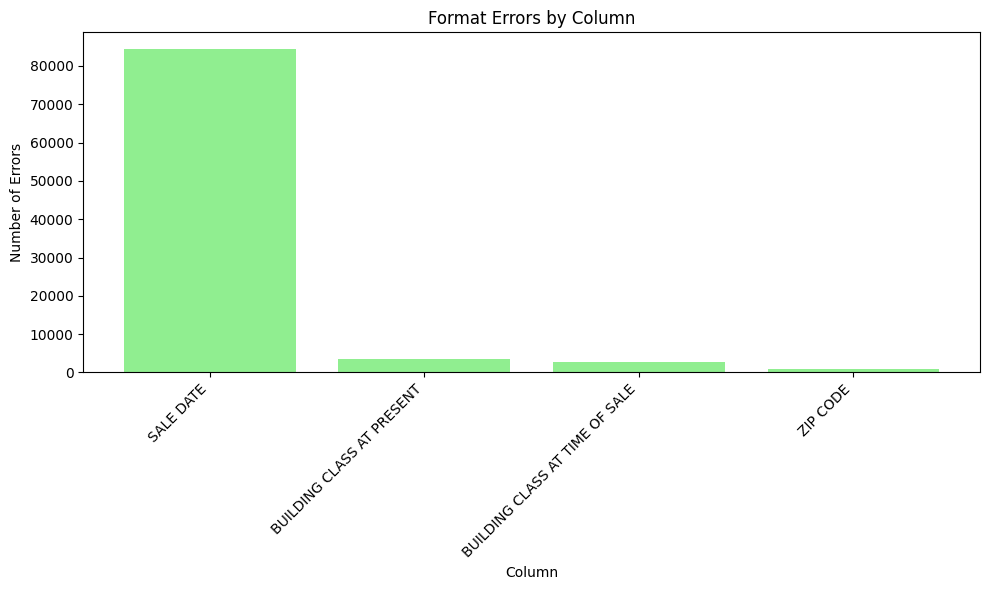

In [14]:
# RESULTS
# Generate report
print("Format Error Report:")
print("-" * 50)

if not format_errors:
    print("No format errors found.")
else:
    for column, errors in format_errors.items():
        pattern = format_patterns[column]
        print(f"\nColumn '{column}' (expected format: {pattern}):")
        print(f"Found {len(errors)} format errors.")
        print("Examples:")
        for i, (idx, value) in enumerate(errors[:5]):  # Show first 5 examples
            print(f"  - Row {idx+1}: '{value}'")
        if len(errors) > 5:
            print(f"  - ... and {len(errors)-5} more errors.")
            
    # Create a bar chart of error counts
    error_counts = {column: len(errors) for column, errors in format_errors.items()}
    plt.figure(figsize=(10, 6))
    plt.bar(error_counts.keys(), error_counts.values(), color='lightgreen')
    plt.title('Format Errors by Column')
    plt.xlabel('Column')
    plt.ylabel('Number of Errors')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Test 4: Consistency Errors
**Description:**  
This test checks for conflicting or contradictory values. For instance, if the `BOROUGH` code does not align with known NYC boroughs or if related fields such as `BLOCK` and `LOT` are inconsistent.


In [15]:
# PARAMETERS FOR THE CHECKER
# Define pairs of columns that should be consistent with each other
consistency_checks = [
    {
        'columns': ['BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'],
        'description': 'Building class at present should match building class at time of sale for recent sales',
        'condition': lambda row: pd.notna(row['SALE DATE']) and 
                                (pd.to_datetime(row['SALE DATE']).year >= 2022),
        'error_message': 'Building class mismatch for recent sale'
    },
    {
        'columns': ['BOROUGH', 'NEIGHBORHOOD'],
        'description': 'Inconsistencies',
        'mappings': {
            1: ['ALPHABET CITY', 'BATTERY PARK', 'CHELSEA', 'CHINATOWN', 'EAST VILLAGE', 
                'FINANCIAL', 'FLATIRON', 'GRAMERCY', 'GREENWICH VILLAGE', 'HARLEM', 
                'INWOOD', 'LOWER EAST SIDE', 'MIDTOWN', 'MORNINGSIDE HEIGHTS', 
                'MURRAY HILL', 'SOHO', 'TRIBECA', 'UPPER EAST SIDE', 'UPPER WEST SIDE', 
                'WASHINGTON HEIGHTS', 'WEST VILLAGE'],
            2: ['BAYCHESTER', 'BEDFORD PARK', 'BELMONT', 'BRONX', 'CASTLE HILL', 
                'CITY ISLAND', 'CONCOURSE', 'FORDHAM', 'HIGHBRIDGE', 'HUNTS POINT', 
                'KINGSBRIDGE', 'MELROSE', 'MORRIS HEIGHTS', 'MORRIS PARK', 'MORRISANIA', 
                'MOTT HAVEN', 'PARKCHESTER', 'PELHAM BAY', 'RIVERDALE', 'SOUNDVIEW', 
                'THROGS NECK', 'TREMONT', 'UNIVERSITY HEIGHTS', 'WILLIAMSBRIDGE'],
            3: ['BAY RIDGE', 'BEDFORD STUYVESANT', 'BENSONHURST', 'BOROUGH PARK', 'BROWNSVILLE', 
                'BUSHWICK', 'CANARSIE', 'CARROLL GARDENS', 'CLINTON HILL', 'CONEY ISLAND', 
                'CROWN HEIGHTS', 'CYPRESS HILLS', 'DUMBO', 'EAST FLATBUSH', 'EAST NEW YORK', 
                'FLATBUSH', 'FLATLANDS', 'FORT GREENE', 'GOWANUS', 'GRAVESEND', 'GREENPOINT', 
                'MIDWOOD', 'PARK SLOPE', 'PROSPECT HEIGHTS', 'RED HOOK', 'SHEEPSHEAD BAY', 
                'SUNSET PARK', 'WILLIAMSBURG', 'WINDSOR TERRACE'],
            4: ['ASTORIA', 'BAYSIDE', 'CORONA', 'ELMHURST', 'FAR ROCKAWAY', 'FLUSHING', 
                'FOREST HILLS', 'FRESH MEADOWS', 'JAMAICA', 'KEW GARDENS', 'LONG ISLAND CITY', 
                'MASPETH', 'MIDDLE VILLAGE', 'OZONE PARK', 'QUEENS VILLAGE', 'REGO PARK', 
                'RICHMOND HILL', 'RIDGEWOOD', 'ROCKAWAY', 'SUNNYSIDE', 'WHITESTONE', 'WOODHAVEN', 
                'WOODSIDE'],
            5: ['ANNADALE', 'ARDEN HEIGHTS', 'ARROCHAR', 'BLOOMFIELD', 'BULLS HEAD', 
                'CHARLESTOWN', 'CLIFTON', 'DONGAN HILLS', 'ELTINGVILLE', 'GREAT KILLS', 
                'GRYMES HILL', 'HUGUENOT', 'MARINERS HARBOR', 'NEW DORP', 'PORT RICHMOND', 
                'PRINCES BAY', 'RICHMONDTOWN', 'ROSSVILLE', 'ST. GEORGE', 'STATEN ISLAND', 
                'TOMPKINSVILLE', 'TOTTENVILLE', 'WEST BRIGHTON', 'WESTERLEIGH']
        },
        'error_message': 'Neighborhood inconsistent with borough'
    }
]

In [16]:
# CHECKER CODE
def check_consistency(df, consistency_checks):
    """
    Check for consistency between related fields in the dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check
    consistency_checks : list
        List of dictionaries defining consistency checks
        
    Returns:
    --------
    dict
        A dictionary with check descriptions as keys and lists of inconsistent rows
    """
    errors = {}
    
    for check in consistency_checks:
        columns = check['columns']
        description = check['description']
        
        # Verify columns exist in the dataframe
        if not all(column in df.columns for column in columns):
            missing_cols = [col for col in columns if col not in df.columns]
            print(f"Warning: Columns {missing_cols} not found in the dataframe.")
            continue
            
        inconsistent_rows = []
        
        # Check consistency based on check type
        if 'condition' in check:
            # Conditional consistency check
            condition = check['condition']
            for idx, row in df.iterrows():
                if condition(row):
                    if row[columns[0]] != row[columns[1]]:
                        inconsistent_rows.append((idx, row[columns[0]], row[columns[1]]))
                        
        elif 'mappings' in check:
            # Mapping-based consistency check
            mappings = check['mappings']
            for idx, row in df.iterrows():
                borough = row[columns[0]]
                neighborhood = row[columns[1]]
                
                if pd.isna(borough) or pd.isna(neighborhood):
                    continue
                
                try:
                    borough = int(borough)
                    if borough in mappings:
                        valid_neighborhoods = mappings[borough]
                        if neighborhood not in valid_neighborhoods:
                            inconsistent_rows.append((idx, borough, neighborhood))
                except (ValueError, TypeError):
                    # Skip non-numeric borough values
                    continue
        
        if inconsistent_rows:
            errors[description] = {
                'columns': columns,
                'error_message': check['error_message'],
                'rows': inconsistent_rows
            }
            
    return errors

# Run the checker
consistency_errors = check_consistency(df, consistency_checks)

Consistency Error Report:
--------------------------------------------------

Check: Inconsistencies
Columns involved: BOROUGH, NEIGHBORHOOD
Found 46024 consistency errors.
Examples:
  - Row 1127: BOROUGH='1', NEIGHBORHOOD='CIVIC CENTER' (Neighborhood inconsistent with borough)
  - Row 1128: BOROUGH='1', NEIGHBORHOOD='CIVIC CENTER' (Neighborhood inconsistent with borough)
  - Row 1129: BOROUGH='1', NEIGHBORHOOD='CIVIC CENTER' (Neighborhood inconsistent with borough)
  - Row 1130: BOROUGH='1', NEIGHBORHOOD='CIVIC CENTER' (Neighborhood inconsistent with borough)
  - Row 1131: BOROUGH='1', NEIGHBORHOOD='CIVIC CENTER' (Neighborhood inconsistent with borough)
  - ... and 46019 more errors.


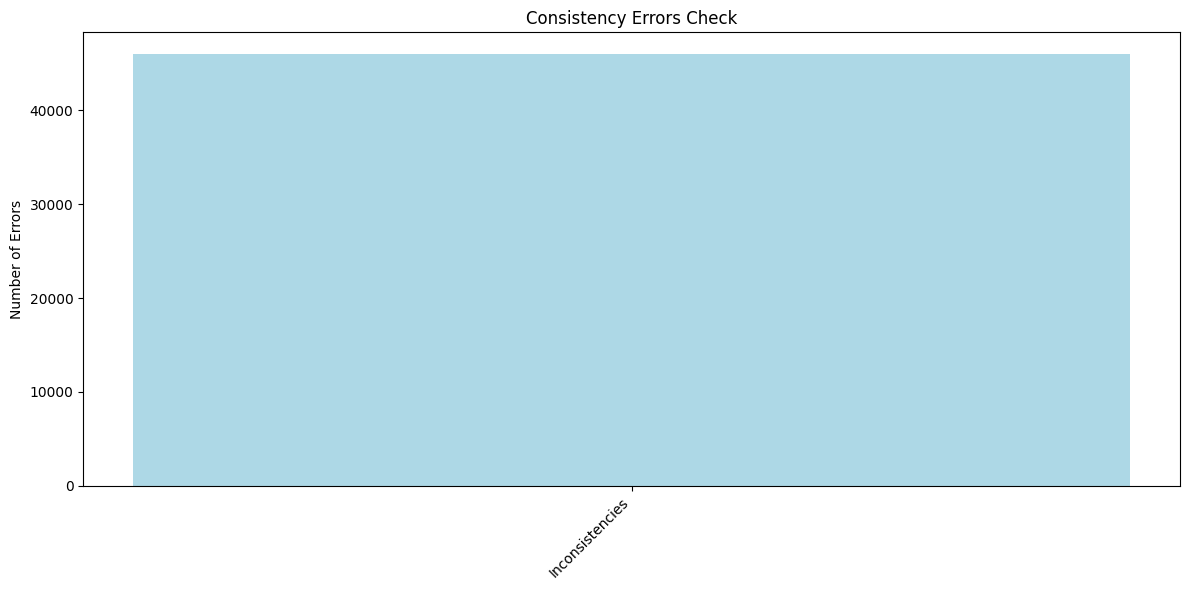

In [17]:
# RESULT
# Generate report
print("Consistency Error Report:")
print("-" * 50)

if not consistency_errors:
    print("No consistency errors found.")
else:
    for description, error_info in consistency_errors.items():
        columns = error_info['columns']
        error_message = error_info['error_message']
        inconsistent_rows = error_info['rows']
        
        print(f"\nCheck: {description}")
        print(f"Columns involved: {', '.join(columns)}")
        print(f"Found {len(inconsistent_rows)} consistency errors.")
        print("Examples:")
        for i, row_data in enumerate(inconsistent_rows[:5]):  # Show first 5 examples
            idx, val1, val2 = row_data
            print(f"  - Row {idx+1}: {columns[0]}='{val1}', {columns[1]}='{val2}' ({error_message})")
        if len(inconsistent_rows) > 5:
            print(f"  - ... and {len(inconsistent_rows)-5} more errors.")
    
    # Create a bar chart of error counts
    error_counts = {desc: len(info['rows']) for desc, info in consistency_errors.items()}
    plt.figure(figsize=(12, 6))
    plt.bar(error_counts.keys(), error_counts.values(), color='lightblue')
    plt.title('Consistency Errors Check')
    plt.ylabel('Number of Errors')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Test 5: Uniqueness Errors
**Description:**  
This test checks that attributes expected to uniquely identify each record (such as a single key column or a combination of columns like BOROUGH, BLOCK, and LOT) do not have duplicates. Duplicate entries in these attributes can indicate data entry errors or merged datasets with overlapping keys.


In [18]:
# PARAMETERS FOR THE CHECKER
# Define columns that should have unique values
uniqueness_checks = [
    {
        'columns': ['BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'],
        'description': 'Building class should be unique for each sale'
    },
    {
        'columns': ['BOROUGH', 'NEIGHBORHOOD'],
        'description': 'Neighborhood should be unique within each borough'
    }
]

In [19]:
# CHECKER CODE
def check_uniqueness(df, uniqueness_checks):
    """
    Check for uniqueness of values in specified columns of the dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check.
    uniqueness_checks : list
        List of dictionaries defining uniqueness checks.
        
    Returns:
    --------
    dict
        A dictionary with check descriptions as keys and lists of duplicate rows.
    """
    errors = {}
    
    for check in uniqueness_checks:
        columns = check['columns']
        description = check['description']
        
        # Verify that the required columns exist
        if not all(column in df.columns for column in columns):
            missing_cols = [col for col in columns if col not in df.columns]
            print(f"Warning: Columns {missing_cols} not found in the dataframe.")
            continue
            
        # Find duplicate rows based on specified columns
        duplicates = df[df.duplicated(subset=columns, keep=False)]
        duplicate_indices = duplicates.index
        
        if not duplicate_indices.empty:
            first_occurrence = {}
            duplicate_info = []
            
            for idx in duplicate_indices:
                temp = df.loc[idx, columns]
                # If multiple rows are returned, take the first row
                if isinstance(temp, pd.DataFrame):
                    raw_values = temp.iloc[0].tolist()
                else:
                    raw_values = temp.tolist()
                    
                # Convert inner lists (if any) to tuples to ensure hashability
                values = tuple(tuple(x) if isinstance(x, list) else x for x in raw_values)
                
                if values not in first_occurrence:
                    first_occurrence[values] = idx
                else:
                    first_idx = first_occurrence[values]
                    duplicate_info.append((idx, values, first_idx))
            
            errors[description] = {
                'columns': columns,
                'duplicate_info': duplicate_info
            }
            
    return errors

# Run the checker
uniqueness_errors = check_uniqueness(df, uniqueness_checks)

Uniqueness Error Report:
--------------------------------------------------

Check: Building class should be unique for each sale
Columns involved: BUILDING CLASS AT PRESENT, BUILDING CLASS AT TIME OF SALE
Found 84268 duplicate values.
Examples:
  - Row 7: ('C7', 'C7') is a duplicate of row 6
  - Row 9: ('C2', 'C2') is a duplicate of row 5
  - Row 10: ('C4', 'C4') is a duplicate of row 8
  - Row 11: ('C4', 'C4') is a duplicate of row 8
  - Row 12: ('C7', 'C7') is a duplicate of row 6
  - ... and 84263 more duplicates.

Check: Neighborhood should be unique within each borough
Columns involved: BOROUGH, NEIGHBORHOOD
Found 84481 duplicate values.
Examples:
  - Row 6: ('1', 'ALPHABET CITY') is a duplicate of row 5
  - Row 7: ('1', 'ALPHABET CITY') is a duplicate of row 5
  - Row 8: ('1', 'ALPHABET CITY') is a duplicate of row 5
  - Row 9: ('1', 'ALPHABET CITY') is a duplicate of row 5
  - Row 10: ('1', 'ALPHABET CITY') is a duplicate of row 5
  - ... and 84476 more duplicates.


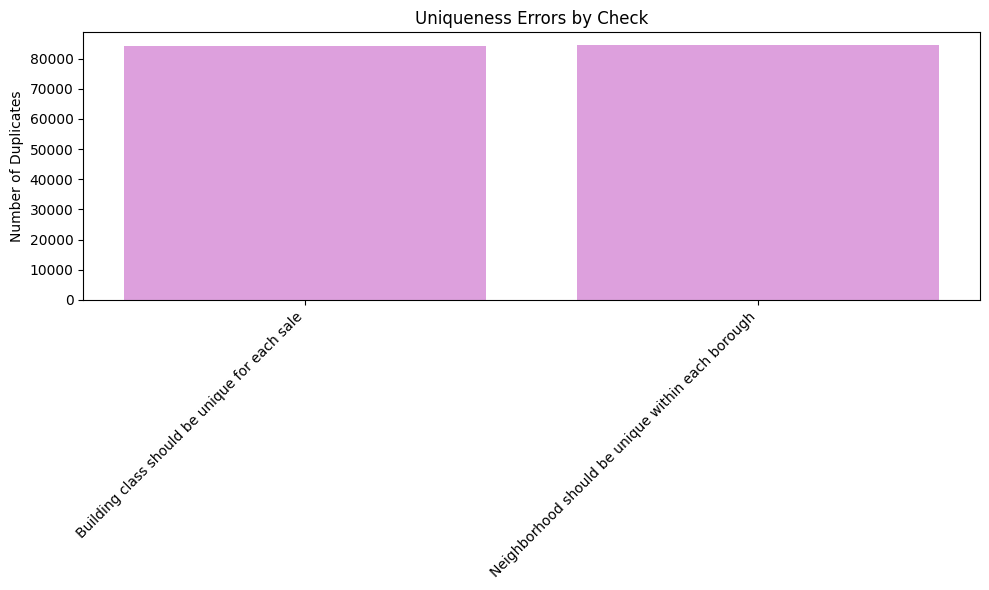

In [20]:
# RESULTS 
# Generate report
print("Uniqueness Error Report:")
print("-" * 50)

if not uniqueness_errors:
    print("No uniqueness errors found.")
else:
    for description, error_info in uniqueness_errors.items():
        columns = error_info['columns']
        duplicate_info = error_info['duplicate_info']
        
        print(f"\nCheck: {description}")
        print(f"Columns involved: {', '.join(columns)}")
        print(f"Found {len(duplicate_info)} duplicate values.")
        print("Examples:")
        for i, (idx, values, first_idx) in enumerate(duplicate_info[:5]):  # Show first 5 examples
            vals_str = ', '.join([f"'{v}'" for v in values])
            print(f"  - Row {idx+1}: ({vals_str}) is a duplicate of row {first_idx+1}")
        if len(duplicate_info) > 5:
            print(f"  - ... and {len(duplicate_info)-5} more duplicates.")
    
    # Create a bar chart of duplicate counts
    duplicate_counts = {desc: len(info['duplicate_info']) for desc, info in uniqueness_errors.items()}
    plt.figure(figsize=(10, 6))
    plt.bar(duplicate_counts.keys(), duplicate_counts.values(), color='plum')
    plt.title('Uniqueness Errors by Check')
    plt.ylabel('Number of Duplicates')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Test 6: Presence Errors
**Description:**  
This test verifies that required fields (such as `SALE PRICE`, `SALE DATE`, `ADDRESS`) are not missing or empty. Missing values can indicate incomplete records, which may lead to errors or biases in subsequent analysis.

In [21]:
# PARAMETERS FOR THE CHECKER
# List all columns where values should be present (not null or empty)
required_columns = [
    'BOROUGH',
    'BLOCK',
    'LOT',
    'SALE DATE',
    'SALE PRICE',
    'ADDRESS'
]

# Define acceptable empty values
empty_values = [None, np.nan, '', '0', 0]

# Minimum required completeness percentage (0-100)
min_completeness = 95  # At least 95% of values should be present

In [22]:
# CHECKER CODE
def check_presence(df, required_columns, empty_values, min_completeness):
    """
    Check for missing values in required columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check
    required_columns : list
        List of columns that should have values
    empty_values : list
        List of values considered as empty
    min_completeness : float
        Minimum percentage of non-empty values required
        
    Returns:
    --------
    dict
        A dictionary with column names as keys and information about missing values
    """
    errors = {}
    
    for column in required_columns:
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue
            
        # Count missing or empty values
        empty_count = 0
        missing_indices = []
        
        for idx, value in enumerate(df[column]):
            if pd.isna(value) or value in empty_values:
                empty_count += 1
                missing_indices.append(idx)
                
        # Calculate completeness percentage
        total_rows = len(df)
        completeness = 100 * (total_rows - empty_count) / total_rows
        
        # Check if completeness is below the minimum required
        if completeness < min_completeness:
            errors[column] = {
                'empty_count': empty_count,
                'completeness': completeness,
                'missing_indices': missing_indices
            }
            
    return errors

# Run the checker
presence_errors = check_presence(df, required_columns, empty_values, min_completeness)

Presence Error Report:
--------------------------------------------------
Minimum required completeness: 95%

Column 'SALE PRICE':
  - Completeness: 87.90% (below threshold of 95%)
  - Missing values: 10228 out of 84548 rows
  - Examples of rows with missing values:
    Row 18312
    Row 18314
    Row 18315
    Row 18316
    Row 18321
    ... and 10223 more rows with missing values.


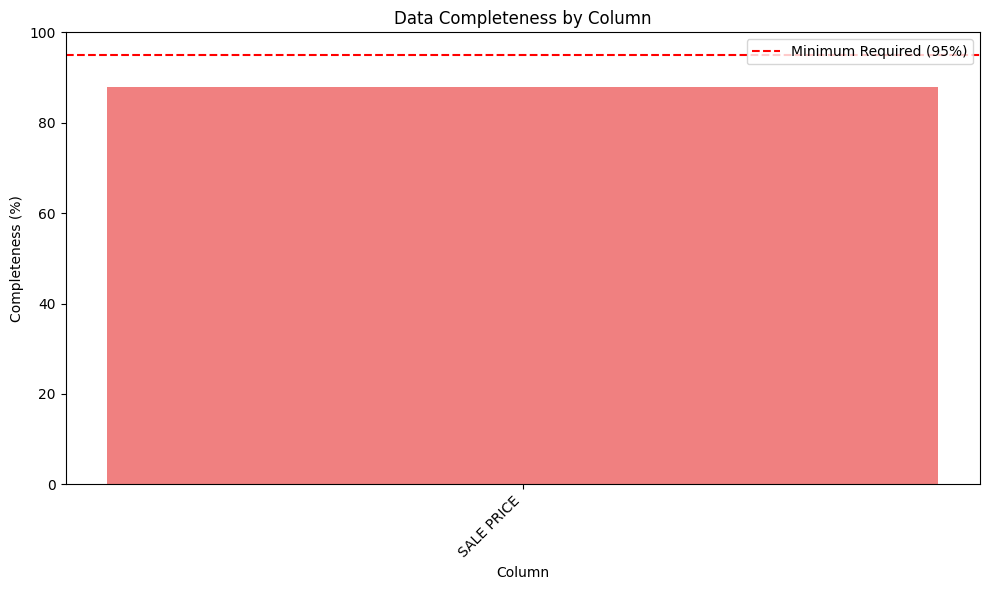

In [23]:
# RESULTS
# Generate report
print("Presence Error Report:")
print("-" * 50)

if not presence_errors:
    print("No presence errors found. All required columns meet the minimum completeness threshold.")
else:
    print(f"Minimum required completeness: {min_completeness}%")
    
    for column, error_info in presence_errors.items():
        empty_count = error_info['empty_count']
        completeness = error_info['completeness']
        missing_indices = error_info['missing_indices']
        
        print(f"\nColumn '{column}':")
        print(f"  - Completeness: {completeness:.2f}% (below threshold of {min_completeness}%)")
        print(f"  - Missing values: {empty_count} out of {len(df)} rows")
        print("  - Examples of rows with missing values:")
        for i, idx in enumerate(missing_indices[:5]):  # Show first 5 examples
            print(f"    Row {idx+1}")
        if len(missing_indices) > 5:
            print(f"    ... and {len(missing_indices)-5} more rows with missing values.")
    
    # Create a bar chart of completeness percentages
    plt.figure(figsize=(10, 6))
    columns = list(presence_errors.keys())
    completeness_values = [100 - (error_info['empty_count'] / len(df) * 100) for error_info in presence_errors.values()]
    
    bars = plt.bar(columns, completeness_values, color='lightcoral')
    plt.axhline(y=min_completeness, color='red', linestyle='--', label=f'Minimum Required ({min_completeness}%)')
    
    plt.title('Data Completeness by Column')
    plt.xlabel('Column')
    plt.ylabel('Completeness (%)')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### Test 7: Length Errors  
**Description:**  
This test verifies that string fields meet specified length requirements. It ensures that text values such as IDs, names, or addresses are neither too short nor excessively long, which can indicate formatting issues or data truncation.


In [24]:
# PARAMETERS FOR THE CHECKER
# List all text columns with their minimum and maximum expected length
length_checks = {
    'ADDRESS': {'min': 5, 'max': 100},  # Street addresses should be reasonably long
    'NEIGHBORHOOD': {'min': 3, 'max': 50},  # Neighborhood names
    'BUILDING CLASS CATEGORY': {'min': 2, 'max': 150},  # Building class descriptions
    'ZIP CODE': {'min': 5, 'max': 5}  # Standard US ZIP code is 5 digits
}

# Specify whether to trim whitespace before length calculation
trim_whitespace = True

In [25]:
# CHECKER CODE
def check_lengths(df, length_checks, trim_whitespace=True):
    """
    Check if text values in the dataframe meet length constraints.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check
    length_checks : dict
        Dictionary with column names as keys and dictionaries of min/max lengths
    trim_whitespace : bool
        Whether to trim leading/trailing whitespace before checking length
        
    Returns:
    --------
    dict
        A dictionary with column names as keys and lists of rows with length errors
    """
    errors = {}
    
    for column, constraints in length_checks.items():
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue
            
        min_length = constraints['min']
        max_length = constraints['max']
        
        length_errors = []
        
        for idx, value in enumerate(df[column]):
            if pd.isna(value):
                continue
                
            # Convert to string and optionally trim whitespace
            str_value = str(value)
            if trim_whitespace:
                str_value = str_value.strip()
                
            # Check length constraints
            length = len(str_value)
            if length < min_length or length > max_length:
                length_errors.append((idx, str_value, length))
                
        if length_errors:
            errors[column] = {
                'constraints': constraints,
                'errors': length_errors
            }
            
    return errors

# Run the checker
length_errors = check_lengths(df, length_checks, trim_whitespace)

Length Error Report:
--------------------------------------------------

Column 'ZIP CODE' (expected length: 5 to 5 characters):
Found 982 length errors.
  - Too short: 982
Examples:
  - Row 75: '0' (length: 1, too short)
  - Row 199: '0' (length: 1, too short)
  - Row 576: '0' (length: 1, too short)
  - Row 577: '0' (length: 1, too short)
  - Row 721: '0' (length: 1, too short)
  - ... and 977 more errors.


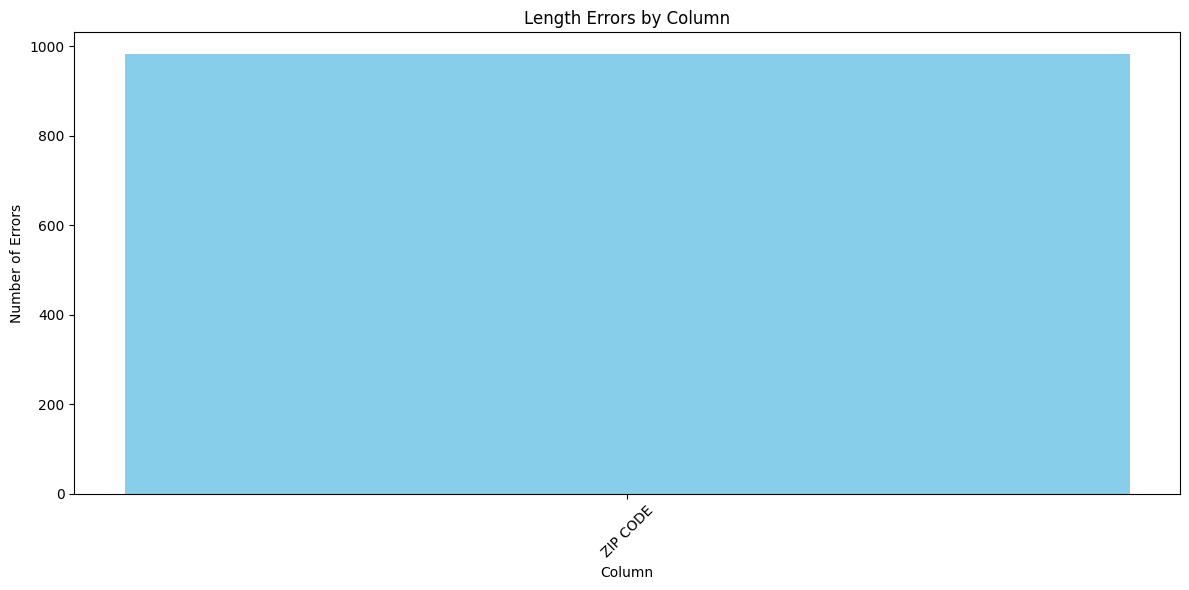

In [26]:
# RESULTS
# Generate report
print("Length Error Report:")
print("-" * 50)

if not length_errors:
    print("No length errors found. All text columns meet their length constraints.")
else:
    for column, error_info in length_errors.items():
        constraints = error_info['constraints']
        errors = error_info['errors']
        
        print(f"\nColumn '{column}' (expected length: {constraints['min']} to {constraints['max']} characters):")
        print(f"Found {len(errors)} length errors.")
        
        # Count too short
        too_short = sum(1 for _, _, length in errors if length < constraints['min'])
        
        print(f"  - Too short: {too_short}")
        print("Examples:")
        for i, (idx, value, length) in enumerate(errors[:5]):  # Show first 5 examples
            issue = "too short" if length < constraints['min'] else "too long"
            print(f"  - Row {idx+1}: '{value}' (length: {length}, {issue})")
        if len(errors) > 5:
            print(f"  - ... and {len(errors)-5} more errors.")
    
   # Compute error counts for each column.
columns = list(length_errors.keys())
too_short_counts = [
    sum(1 for _, _, length in error_info['errors'] if length < error_info['constraints']['min'])
    for error_info in length_errors.values()
]

x = np.arange(len(columns))
bar_width = 0.35

plt.figure(figsize=(12, 6))
# Plot a single bar per column (ZIP CODE bar will be centered as well)
plt.bar(x, too_short_counts, bar_width, color='skyblue')

plt.title('Length Errors by Column')
plt.xlabel('Column')
plt.ylabel('Number of Errors')
plt.xticks(x, columns, rotation=45, ha='center')

# No legend is added (since there's only one type of error)
plt.tight_layout()
plt.show()

### Test 8: Look-up Errors
**Description:**  
This test ensures that the values in categorical fields conform to a predefined list of valid options. Any value not found in the lookup table is flagged as an error, as it may indicate data entry mistakes or inconsistencies in the dataset.

In [27]:
# PARAMETERS FOR THE CHECKER
# List all categorical columns with their allowed values
lookup_checks = {
    'BOROUGH': [1, 2, 3, 4, 5],  # NYC boroughs
    'TAX CLASS AT PRESENT': ['1', '1A', '1B', '1C', '2', '2A', '2B', '2C', '4'],
    'TAX CLASS AT TIME OF SALE': ['1', '1A', '1B', '1C', '2', '2A', '2B', '2C', '4'],
    'BUILDING CLASS CATEGORY': [
        '01 ONE FAMILY DWELLINGS', 
        '02 TWO FAMILY DWELLINGS',
        '03 THREE FAMILY DWELLINGS',
        '04 TAX CLASS 1 CONDOS',
        '05 TAX CLASS 1 VACANT LAND',
        '06 TAX CLASS 1 - OTHER',
        '07 RENTALS - WALKUP APARTMENTS',
        '08 RENTALS - ELEVATOR APARTMENTS',
        '09 COOPS - WALKUP APARTMENTS',
        '10 COOPS - ELEVATOR APARTMENTS',
        '11 CONDOS - WALKUP APARTMENTS',
        '12 CONDOS - ELEVATOR APARTMENTS',
        '13 CONDOS - SPECIAL CONDO BILLING LOTS',
        '14 RENTALS - 4-10 UNIT',
        '15 CONDOS - 2-10 UNIT RESIDENTIAL',
        '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
        '17 CONDOS - COMMERCIAL',
        '18 TAX CLASS 3 - UTILITY PROPERTIES',
        '21 OFFICE BUILDINGS',
        '22 STORE BUILDINGS',
        '23 LOFT BUILDINGS',
        '26 OTHER HOTELS',
        '27 FACTORIES',
        '28 COMMERCIAL CONDOS',
        '29 COMMERCIAL GARAGES',
        '30 WAREHOUSES',
        '31 COMMERCIAL VACANT LAND',
        '32 HOSPITAL AND HEALTH FACILITIES',
        '33 EDUCATIONAL FACILITIES',
        '34 THEATRES',
        '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
        '36 OUTDOOR RECREATIONAL FACILITIES',
        '37 RELIGIOUS FACILITIES',
        '38 ASYLUMS AND HOMES',
        '41 TAX CLASS 4 - OTHER',
        '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC',
        '43 CONDO OFFICE BUILDINGS',
        '44 CONDO RETAIL',
        '45 CONDO - MIXED RESIDENTIAL & COMMERCIAL',
        '46 CONDO - MIXED RESIDENTIAL & COMMERCIAL',
        '47 CONDO - MIXED RESIDENTIAL & COMMERCIAL',
        '48 CONDO - STATE OWNERSHIP',
        '49 CONDO - MIXED RESIDENTIAL & COMMERCIAL'
    ]
}

# Case sensitivity for string comparison
case_sensitive = False

In [28]:
# CHECKER CODE
def check_lookups(df, lookup_checks, case_sensitive=False):
    """
    Check if categorical values in the dataframe exist in predefined lists.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to check
    lookup_checks : dict
        Dictionary with column names as keys and lists of allowed values
    case_sensitive : bool
        Whether string comparisons should be case-sensitive
        
    Returns:
    --------
    dict
        A dictionary with column names as keys and lists of rows with invalid values
    """
    errors = {}
    
    for column, allowed_values in lookup_checks.items():
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue
            
        # Convert allowed values to strings for consistent comparison
        allowed_values_str = [str(val) for val in allowed_values]
        if not case_sensitive:
            allowed_values_str = [val.lower() if isinstance(val, str) else val for val in allowed_values_str]
            
        lookup_errors = []
        unique_invalid_values = set()
        
        for idx, value in enumerate(df[column]):
            if pd.isna(value):
                continue
                
            # Convert to string for comparison
            str_value = str(value)
            if not case_sensitive and isinstance(str_value, str):
                str_value = str_value.lower()
                
            # Check if value is in the allowed list
            if str_value not in allowed_values_str:
                lookup_errors.append((idx, value))
                unique_invalid_values.add(value)
                
        if lookup_errors:
            errors[column] = {
                'allowed_values': allowed_values,
                'errors': lookup_errors,
                'unique_invalid': list(unique_invalid_values)
            }
            
    return errors

# Run the checker
lookup_errors = check_lookups(df, lookup_checks, case_sensitive)

Look-up Error Report:
--------------------------------------------------

Column 'TAX CLASS AT PRESENT':
Found 742 rows with invalid values (2 unique invalid values).
Allowed values: 1, 1A, 1B, 1C, 2, 2A, 2B, 2C, 4
Examples of invalid values:
  - ' ' (found in 738 rows)
  - '3' (found in 4 rows)
Example rows with invalid values:
  - Row 75: ' '
  - Row 199: ' '
  - Row 574: ' '
  - Row 575: ' '
  - Row 576: ' '
  - ... and 737 more rows with invalid values.

Column 'TAX CLASS AT TIME OF SALE':
Found 4 rows with invalid values (1 unique invalid values).
Allowed values: 1, 1A, 1B, 1C, 2, 2A, 2B, 2C, 4
Examples of invalid values:
  - '3' (found in 4 rows)
Example rows with invalid values:
  - Row 2045: '3'
  - Row 2046: '3'
  - Row 20330: '3'
  - Row 20331: '3'

Column 'BUILDING CLASS CATEGORY':
Found 84548 rows with invalid values (47 unique invalid values).
Allowed values: 43 valid options defined
Examples of invalid values:
  - '46 CONDO STORE BUILDINGS                   ' (found in 15

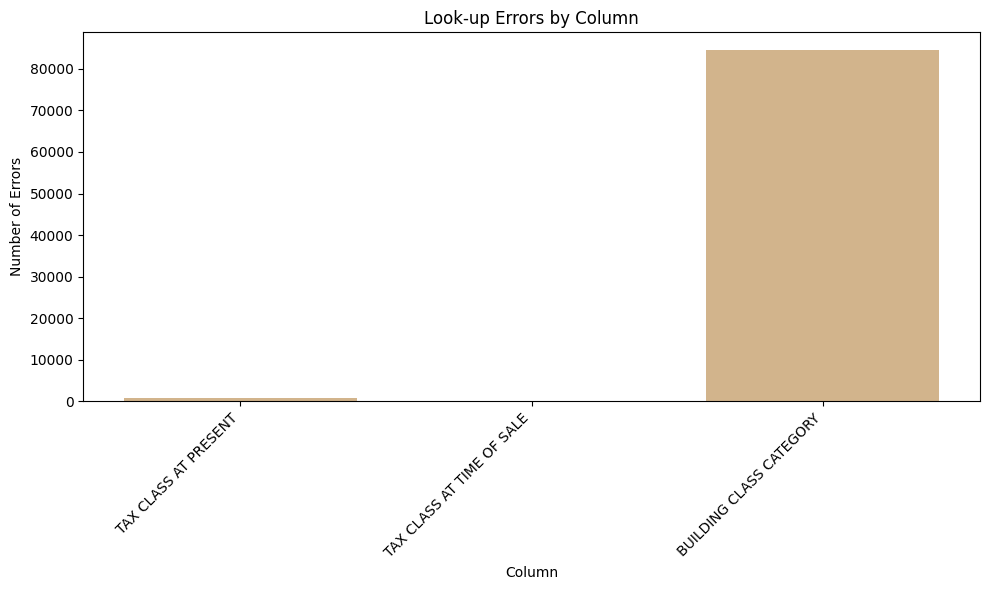

In [29]:
# RESULTS
# Generate report
print("Look-up Error Report:")
print("-" * 50)

if not lookup_errors:
    print("No look-up errors found. All categorical values are valid.")
else:
    for column, error_info in lookup_errors.items():
        errors = error_info['errors']
        unique_invalid = error_info['unique_invalid']
        
        print(f"\nColumn '{column}':")
        print(f"Found {len(errors)} rows with invalid values ({len(unique_invalid)} unique invalid values).")
        
        # Display allowed values if the list is not too long
        allowed_values = error_info['allowed_values']
        if len(allowed_values) <= 10:
            print(f"Allowed values: {', '.join(str(v) for v in allowed_values)}")
        else:
            print(f"Allowed values: {len(allowed_values)} valid options defined")
        
        print("Examples of invalid values:")
        for i, value in enumerate(unique_invalid[:10]):  # Show first 10 unique invalid values
            value_count = sum(1 for _, val in errors if val == value)
            print(f"  - '{value}' (found in {value_count} rows)")
        if len(unique_invalid) > 10:
            print(f"  - ... and {len(unique_invalid)-10} more invalid values.")
        
        print("Example rows with invalid values:")
        for i, (idx, value) in enumerate(errors[:5]):  # Show first 5 examples
            print(f"  - Row {idx+1}: '{value}'")
        if len(errors) > 5:
            print(f"  - ... and {len(errors)-5} more rows with invalid values.")
    
    # Create a bar chart of error counts
    plt.figure(figsize=(10, 6))
    columns = list(lookup_errors.keys())
    error_counts = [len(error_info['errors']) for error_info in lookup_errors.values()]
    
    plt.bar(columns, error_counts, color='tan')
    plt.title('Look-up Errors by Column')
    plt.xlabel('Column')
    plt.ylabel('Number of Errors')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

### Test 9: Exact Duplicate Errors
**Description:**  
This test identifies rows that are complete duplicates across all columns. Such exact duplicates indicate redundant records in the dataset, which can lead to biased analyses if not removed.

In [30]:
# PAREMETERS FOR THE CHECKER
# Please enter the various attributes below to perform the test:
duplicate_columns = []  # Consider all columns

# Specify columns to exclude from duplicate detection
exclude_columns = ['Unnamed: 0'] 

# Specify whether to ignore case when comparing string values
ignore_case = True

treat_nulls_as_equal = True

In [31]:
def check_exact_duplicates(df, duplicate_columns=None, exclude_columns=None, 
                         ignore_case=True, treat_nulls_as_equal=True):
    """
    Check for exact duplicate rows in the dataframe.
    """
    # Determine columns to check
    if duplicate_columns is not None:
        columns_to_check = [col for col in duplicate_columns if col in df.columns]
    else:
        columns_to_check = df.columns.tolist()
        if exclude_columns:
            columns_to_check = [col for col in columns_to_check if col not in exclude_columns]
    
    check_df = df[columns_to_check].copy()
    
    if ignore_case:
        for col in columns_to_check:
            if check_df[col].dtype == object:
                check_df[col] = check_df[col].str.lower()
    
    duplicates = check_df.duplicated(keep=False)
    duplicate_indices = duplicates[duplicates].index
    
    first_occurrences = {}
    duplicate_info = []
    
    if len(duplicate_indices) > 0:
        duplicate_groups = check_df.loc[duplicate_indices].groupby(columns_to_check)
        
        for _, group in duplicate_groups:
            group_indices = group.index.tolist()
            first_idx = group_indices[0]
            
            for dup_idx in group_indices[1:]:
                duplicate_info.append({
                    'duplicate_idx': dup_idx,
                    'first_idx': first_idx,
                    'values': df.loc[dup_idx, columns_to_check].to_dict()
                })
    
    return {
        'columns_checked': columns_to_check,
        'duplicate_count': len(duplicate_indices),
        'duplicate_indices': duplicate_indices,
        'duplicate_info': duplicate_info
    }

duplicate_columns = None 
exclude_columns = ['Index']  
ignore_case = True
treat_nulls_as_equal = True

# Run checker
exact_duplicate_errors = check_exact_duplicates(df, duplicate_columns, exclude_columns, 
                                              ignore_case, treat_nulls_as_equal)

Exact Duplicate Error Report:
--------------------------------------------------
Found 1446 exact duplicate rows.
Columns checked: BOROUGH, NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BLOCK, LOT, EASE-MENT, BUILDING CLASS AT PRESENT, ADDRESS, APARTMENT NUMBER, ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, TAX CLASS AT TIME OF SALE, BUILDING CLASS AT TIME OF SALE, SALE PRICE, SALE DATE

Top duplicated rows:

Original row 9620 appears 15 times as duplicates at rows:
  - Row 9621
  - Row 9623
  - Row 9625
  - Row 9626
  - Row 9628
  - ... and 10 more duplicate rows.
Sample values: BOROUGH, NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BLOCK = 9619    1
9619    3
9619    4
Name: BOROUGH, dtype: int64, 9619      MIDTOWN WEST
9619     CYPRESS HILLS
9619    FLUSHING-NORTH
Name: NEIGHBORHOOD, dtype: object, 9619    26 OTHER HOTELS                            
9619    02 TWO FAMILY DWELLINGS           

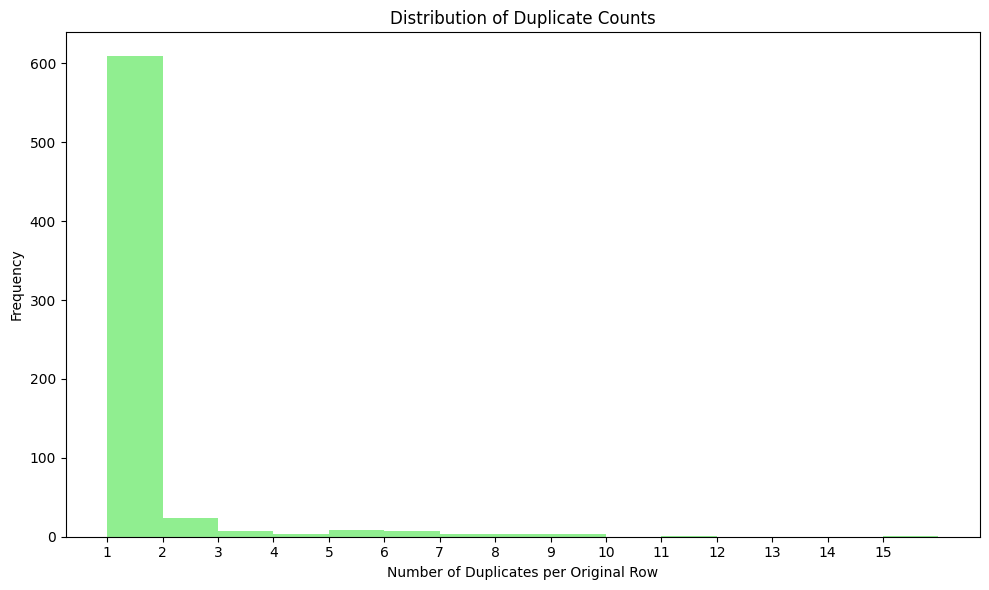

In [32]:
# RESULTS
# Generate report
print("Exact Duplicate Error Report:")
print("-" * 50)

duplicate_count = exact_duplicate_errors['duplicate_count']
columns_checked = exact_duplicate_errors['columns_checked']
duplicate_info = exact_duplicate_errors['duplicate_info']

if duplicate_count == 0:
    print("No exact duplicates found.")
else:
    print(f"Found {duplicate_count} exact duplicate rows.")
    print(f"Columns checked: {', '.join(columns_checked)}")
    
    # Group duplicates by their first occurrence
    duplicates_by_first = {}
    for info in duplicate_info:
        first_idx = info['first_idx']
        if first_idx not in duplicates_by_first:
            duplicates_by_first[first_idx] = []
        duplicates_by_first[first_idx].append(info['duplicate_idx'])
    
    # Report on top duplicated rows
    print("\nTop duplicated rows:")
    for i, (first_idx, duplicates) in enumerate(sorted(duplicates_by_first.items(), key=lambda x: len(x[1]), reverse=True)[:5]):
        print(f"\nOriginal row {first_idx+1} appears {len(duplicates)} times as duplicates at rows:")
        for j, dup_idx in enumerate(duplicates[:5]):
            print(f"  - Row {dup_idx+1}")
        if len(duplicates) > 5:
            print(f"  - ... and {len(duplicates)-5} more duplicate rows.")
            
        sample_cols = min(5, len(columns_checked))
        display_cols = columns_checked[:sample_cols]
        values = [str(df.loc[first_idx, col]) for col in display_cols]
        print(f"Sample values: {', '.join(display_cols)} = {', '.join(values)}")
    
    # Create a histogram of duplicate counts
    duplicate_counts = [len(duplicates) for first_idx, duplicates in duplicates_by_first.items()]
    
    plt.figure(figsize=(10, 6))
    plt.hist(duplicate_counts, bins=range(1, max(duplicate_counts)+2), color='lightgreen')
    plt.title('Distribution of Duplicate Counts')
    plt.xlabel('Number of Duplicates per Original Row')
    plt.ylabel('Frequency')
    plt.xticks(range(1, max(duplicate_counts)+1))
    plt.tight_layout()
    plt.show()

### Test 10: Near Duplicate Errors
**Description:**  
This test identifies rows that are very similar but not identical. Near duplicate errors can occur due to minor differences in data entries (such as extra spaces, capitalization differences, or slight typographical variations) that should be standardized to maintain data consistency.

In [33]:
# PARAMETERS FOR THE CHECKER
near_duplicate_columns = ['ADDRESS', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'SALE PRICE']
similarity_threshold = 90
max_comparisons = 10000
similarity_method = 'token_sort_ratio'  # Currently, only token_sort_ratio is implemented.
batch_size = 1000  # Process 1000 comparisons at a time

In [34]:
#CHECKER CODE
def check_near_duplicates(df, near_duplicate_columns, similarity_threshold=90, 
                          max_comparisons=10000, similarity_method='token_sort_ratio',
                          batch_size=1000):
    """Memory-efficient near-duplicate checker using batch processing."""
    
    def process_batch(pairs_batch):
        results = []
        for i, j in pairs_batch:
            text1 = check_df.iloc[i]['_concat_text']
            text2 = check_df.iloc[j]['_concat_text']
            # Currently, only token_sort_ratio is implemented.
            similarity = fuzz.token_sort_ratio(str(text1), str(text2))
            if similarity >= similarity_threshold:
                results.append({
                    'index1': i, 
                    'index2': j,
                    'similarity': similarity,
                    'values1': df.iloc[i][columns_to_check].to_dict(),
                    'values2': df.iloc[j][columns_to_check].to_dict()
                })
        return results

    # Initial setup: only check columns that exist in the dataframe.
    columns_to_check = [col for col in near_duplicate_columns if col in df.columns]
    check_df = df[columns_to_check].copy()
    check_df['_concat_text'] = check_df[columns_to_check].astype(str).apply(' '.join, axis=1)
    
    # Generate pairs as an iterator.
    n = len(check_df)
    total_possible_pairs = (n * (n-1)) // 2
    total_pairs = min(max_comparisons, total_possible_pairs)
    pairs_iterator = itertools.combinations(range(n), 2)
    
    # Process in batches with a progress bar.
    near_duplicate_pairs = []
    processed = 0
    
    with tqdm(total=total_pairs, desc="Processing near duplicates") as pbar:
        while processed < total_pairs:
            batch = list(itertools.islice(pairs_iterator, batch_size))
            if not batch:
                break
            results = process_batch(batch)
            near_duplicate_pairs.extend(results)
            processed += len(batch)
            pbar.update(len(batch))
            if processed >= max_comparisons:
                break
    
    return {
        'near_duplicate_pairs': near_duplicate_pairs,
        'count': len(near_duplicate_pairs),
        'columns_checked': columns_to_check
    }

# Run the near-duplicate checker using the parameters defined above.
near_duplicate_errors = check_near_duplicates(
    df, 
    near_duplicate_columns=near_duplicate_columns,
    similarity_threshold=similarity_threshold,
    max_comparisons=max_comparisons,
    similarity_method=similarity_method,
    batch_size=batch_size
)

print(f"Found {near_duplicate_errors['count']} near duplicate pairs in columns: {near_duplicate_errors['columns_checked']}")

Processing near duplicates: 100%|██████████| 10000/10000 [00:01<00:00, 7694.57it/s]

Found 0 near duplicate pairs in columns: ['ADDRESS', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'SALE PRICE']


In [35]:
# RESULTS
# Generated report
print("Near Duplicate Error Report:")
print("-" * 50)

count = near_duplicate_errors['count']
columns_checked = near_duplicate_errors['columns_checked']
near_duplicate_pairs = near_duplicate_errors['near_duplicate_pairs']

if count == 0:
    print("No near-duplicates found above the similarity threshold.")
else:
    print(f"Found {count} near-duplicate pairs with similarity ≥ {similarity_threshold}%.")
    print(f"Columns checked: {', '.join(columns_checked)}")
    print(f"Similarity method used: {similarity_method}")
    
    # Sort by similarity (descending)
    sorted_pairs = sorted(near_duplicate_pairs, key=lambda x: x['similarity'], reverse=True)
    
    print("\nTop near-duplicate pairs:")
    for i, pair in enumerate(sorted_pairs[:5]):
        idx1, idx2 = pair['index1'], pair['index2']
        similarity = pair['similarity']
        
        print(f"\nPair {i+1} (Similarity: {similarity}%):")
        print(f"  Row {idx1+1} and Row {idx2+1}:")
        
        # Display values from both rows for comparison
        for col in columns_checked:
            val1 = df.loc[idx1, col]
            val2 = df.loc[idx2, col]
            if val1 != val2:
                print(f"  - {col}: '{val1}' vs '{val2}'")
            else:
                print(f"  - {col}: '{val1}' (identical)")
    
    if count > 5:
        print(f"\n... and {count-5} more near-duplicate pairs.")
    
    # Create a histogram of similarity scores
    similarities = [pair['similarity'] for pair in near_duplicate_pairs]
    
    plt.figure(figsize=(10, 6))
    plt.hist(similarities, bins=10, color='orchid')
    plt.title('Distribution of Similarity Scores')
    plt.xlabel('Similarity Score (%)')
    plt.ylabel('Number of Pairs')
    plt.xlim(similarity_threshold, 100)
    plt.tight_layout()
    plt.show()

Near Duplicate Error Report:
--------------------------------------------------
No near-duplicates found above the similarity threshold.


## References

### Data Analysis and Visualization Resources

#### 1. Seaborn Documentation

**Link:** [Seaborn Documentation](https://seaborn.pydata.org/)  
**How It Helped:**  
The Seaborn documentation was instrumental in helping us implement various visualizations like countplots, histograms, and scatterplots. 


---

### 2. Pandas Documentation

**Link:** [Pandas Documentation](https://pandas.pydata.org/docs/)  
**How It Helped:**  
Pandas' powerful data manipulation functions were essential in cleaning and transforming the dataset. 


---

### 3. OpenAI (ChatGPT), Claude, DeepSeek (R1)

**How It Helped:**  
OpenAI’s ChatGPT, ClaudeAI, and DeepSeek R1 helped by suggesting additional analysis techniques when we were brainstorming how to error-check the datasets. Addtionally, if we dealt with any code error, we used the AI to help us debug.


---

### 4. Stack Overflow

**Link:** [Stack Overflow](https://stackoverflow.com/)  
**How It Helped:**  
Stack Overflow was a key resource to better understand how we can make the required analysis for each error-check. 

---

### 5. Towards Data Science (Medium)

**Link:** [Towards Data Science](https://towardsdatascience.com/)  
**How It Helped:**  
The article on data exploration techniques from Towards Data Science helped us approach with unknown areas when dealing with error-checking. 

